In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
VDATA = '5 run ACG 50th percentile value timing' + '/'
RDATA = '5 run random ACG timing' + '/'
T = 8759 

In [3]:
df_vKPI = pd.read_csv(VDATA+'5 run KPIs 1.csv',index_col=0)
df_rKPI = pd.read_csv(RDATA+'5 run KPIs 1.csv',index_col=0)
df_vEps = pd.read_csv(VDATA+'5 run epsilons 1.csv',index_col=0)
df_rEps = pd.read_csv(RDATA+'5 run epsilons 1.csv',index_col=0)

In [4]:
df_agg = pd.concat([df_vKPI[['mean','std']],df_rKPI[['mean','std']]], axis='columns')

In [5]:
df_agg

,mean,std,mean,std
cost_function,,,,
annual_peak_average,1.102271,3.970812e-07,1.125411,0.127152
carbon_emissions_total,0.891564,1.002569e-03,0.888204,0.001920
cost_total,0.807367,8.952344e-04,0.804527,0.001682
daily_one_minus_load_factor_average,0.824849,4.314993e-01,1.146956,0.153446
daily_peak_average,0.928675,3.823566e-03,0.937486,0.006189
electricity_consumption_total,0.901416,9.219719e-04,0.897688,0.001676
monthly_one_minus_load_factor_average,0.987149,1.431094e-03,0.992313,0.006979
ramping_average,1.194449,3.709350e-03,1.216569,0.005773
zero_net_energy,1.109250,1.757605e-04,1.108798,0.000319


In [6]:
df_agg.columns = ['Mean_KPIs_for_ST_Attack',
                  'KPI_STD_for_ST_Attack',
                  'Mean_KPIs_for_Randomly_Timed_Attack', 
                  'KPI_STD_for_Randomly_Timed_Attack']

<Axes: title={'center': 'ACG Attack Means KPIs Over 5 Runs with STD Error, for Random and Strategic Timing'}, ylabel='cost_function'>

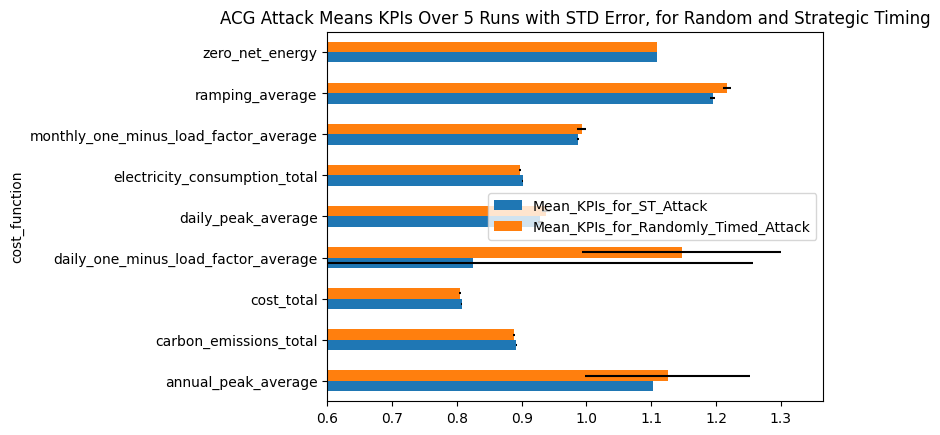

In [7]:
df_agg[['Mean_KPIs_for_ST_Attack','Mean_KPIs_for_Randomly_Timed_Attack']].plot.barh(
                xerr = [df_agg['KPI_STD_for_ST_Attack'], df_agg['KPI_STD_for_Randomly_Timed_Attack']],
                xlim=0.6, 
                title='ACG Attack Means KPIs Over 5 Runs with STD Error, for Random and Strategic Timing')

Text(0.5, 0, 'Normalized KPI')

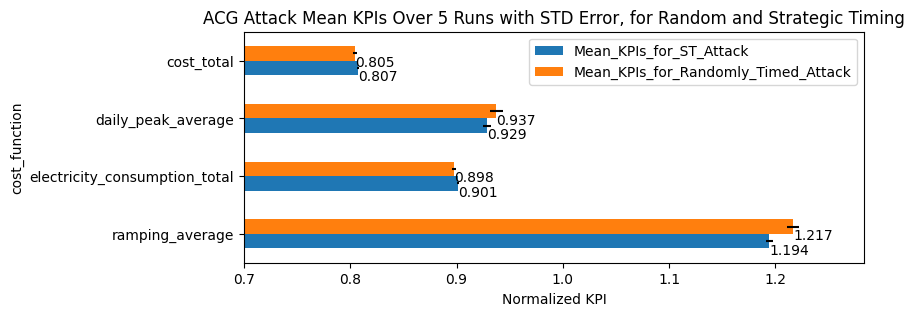

In [18]:
key_KPIs = ['ramping_average','electricity_consumption_total','daily_peak_average','cost_total']
ax = df_agg.loc[key_KPIs][['Mean_KPIs_for_ST_Attack','Mean_KPIs_for_Randomly_Timed_Attack']].plot.barh(
                xerr = [df_agg.loc[key_KPIs]['KPI_STD_for_ST_Attack'], df_agg.loc[key_KPIs]['KPI_STD_for_Randomly_Timed_Attack']],
                xlim=0.7,
                figsize=(8,3),
                title='ACG Attack Mean KPIs Over 5 Runs with STD Error, for Random and Strategic Timing',
                #ylabel = 'Normalized KPI'
                )
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width(), 
            i.get_y()-0.1,
            str(round((i.get_width()), 3)), 
            fontsize=10, 
            )
ax.legend(
    #bbox_to_anchor=(1.0, .42)
    )
ax.set_xlabel('Normalized KPI')


In [9]:
vASRs = df_vEps.notna().mean()
vASRs.name = 'ASR_for ST_Attack'
rASRs = df_rEps.notna().mean()
rASRs.name = 'ASR_for_Randomly_Timed_Attack'


In [10]:
ASRs = pd.concat([rASRs,vASRs],axis='columns')

In [11]:
ASRs.agg(['mean','std', 'var'], axis='rows')

,ASR_for_Randomly_Timed_Attack,ASR_for ST_Attack
mean,0.980284,0.988091
std,0.010957,0.001729
var,0.000120,0.000003


Perturbation rates

In [12]:
(df_vEps.count()/T).agg(['mean','std', 'var'], axis='rows')

mean    4.982761e-01
std     8.717255e-04
var     7.599053e-07
dtype: float64

In [13]:
(df_rEps.count()/T).agg(['mean','std', 'var'], axis='rows')

mean    0.496130
std     0.005545
var     0.000031
dtype: float64